<a href="https://colab.research.google.com/github/DamodaraBarbosa/estudos_data_science/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [59]:
sns.set()

# Carregando os dados no dataframe

In [60]:
dados = pd.read_csv('/content/drive/MyDrive/PracticingDataLinearRegression/heart.csv')
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [61]:
dados.shape

(918, 12)

# Análise das variáveis

## Coluna `Age`:

In [62]:
dados['Age'].value_counts()[:20]

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
Name: Age, dtype: int64

O método sort_index() ordena os dados pela ordem do *index*.

In [63]:
dados['Age'].value_counts().sort_index()[:20]

28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
Name: Age, dtype: int64

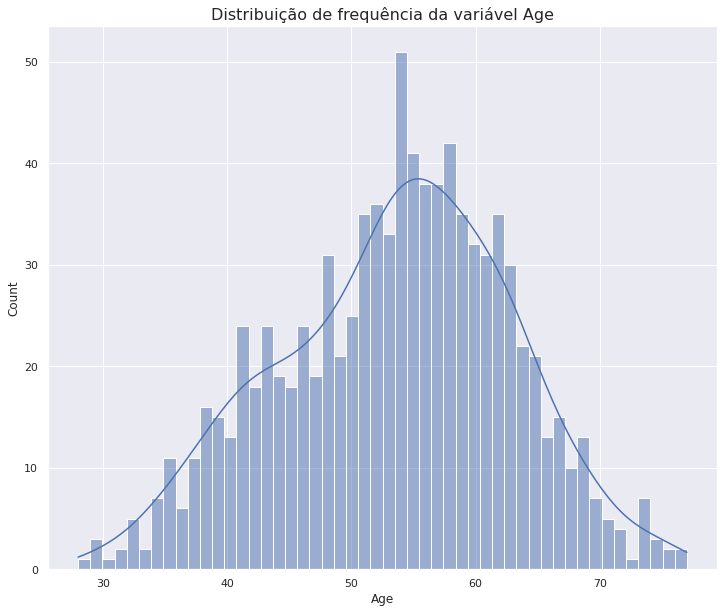

In [64]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(dados['Age'], bins= 50, kde= True)
ax.set_title('Distribuição de frequência da variável Age', fontsize= 16)
plt.show()

## Coluna `Sex`

In [65]:
dados['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

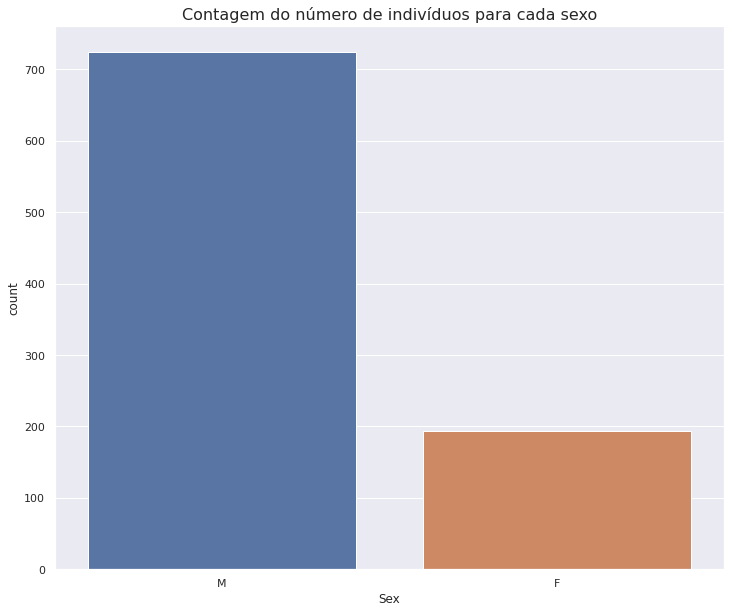

In [66]:
plt.figure(figsize= (12, 10))
ax = sns.countplot(data= dados, x= 'Sex')
ax.set_title('Contagem do número de indivíduos para cada sexo', fontsize= 16)
plt.show()

## Coluna `ChestPainType` 

In [67]:
dados['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

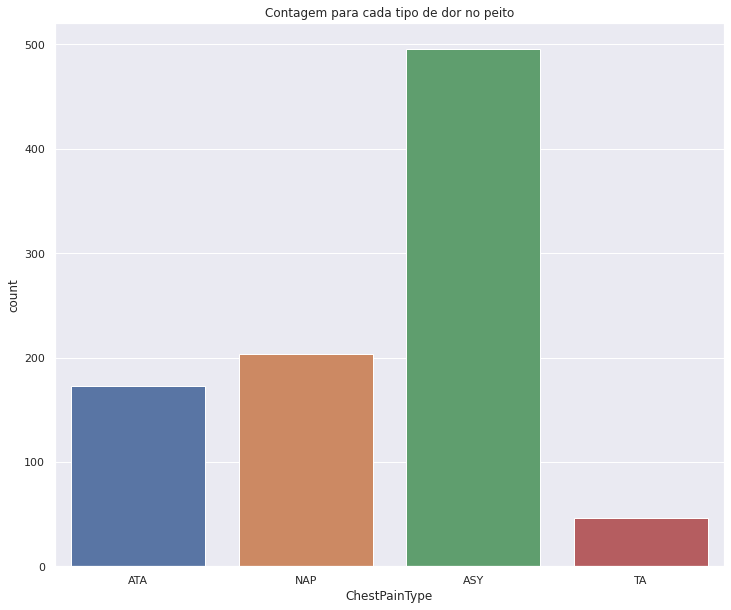

In [68]:
plt.figure(figsize= (12, 10))
ax = sns.countplot(data= dados, x= 'ChestPainType')
ax.set_title('Contagem para cada tipo de dor no peito')
plt.show()

## Coluna `RestingBP`

Pressão sanguínea em repouso, apenas pressão sistólica!

In [69]:
dados['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164])

In [70]:
dados['RestingBP'].value_counts().sort_index()

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

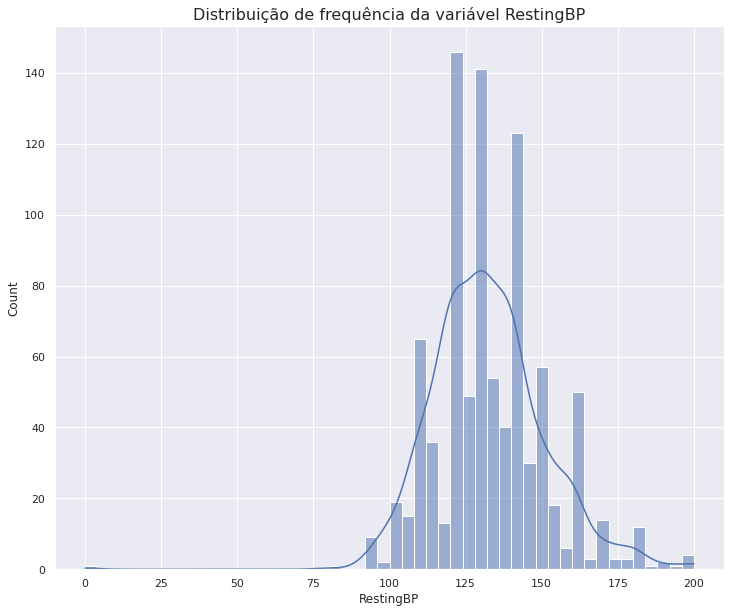

In [71]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(dados['RestingBP'], bins= 50, kde= True)
ax.set_title('Distribuição de frequência da variável RestingBP', fontsize= 16)
plt.show()

## Coluna `Cholesterol`

In [72]:
dados['Cholesterol'].value_counts().sort_index()

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

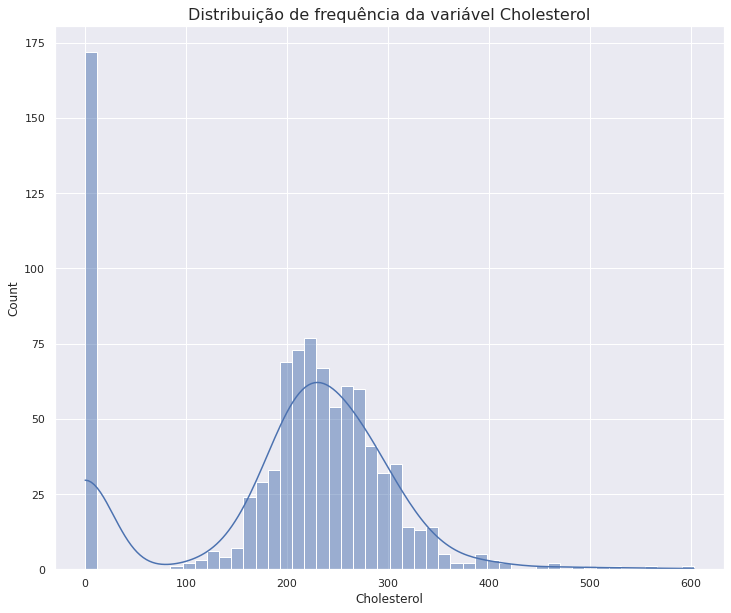

In [73]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(dados['Cholesterol'], bins= 50, kde= True)
ax.set_title('Distribuição de frequência da variável Cholesterol', fontsize= 16)
plt.show()

## Coluna `FastingBS` (açúcar no sangue, em jejum)

In [74]:
dados['FastingBS'].unique()

array([0, 1])

In [75]:
dados['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

Quando FastingBS < 120 mg/dL (não diabético) = 0
Quando FastingBS >= 120 mg/dL (diabético) = 1

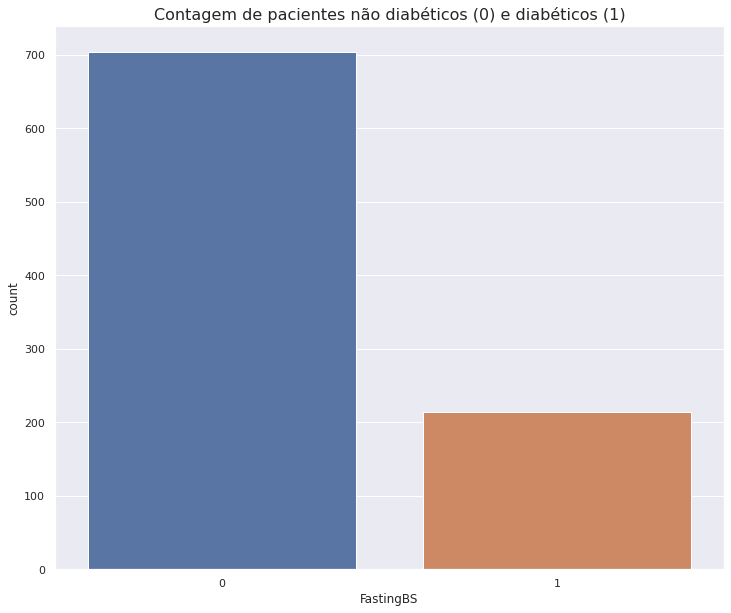

In [76]:
plt.figure(figsize= (12, 10))
ax = sns.countplot(data= dados, x= 'FastingBS')
ax.set_title('Contagem de pacientes não diabéticos (0) e diabéticos (1)',fontsize= 16)
plt.show()

##Coluna `RestingECG` (eletrocardiograma em repouso)

In [77]:
dados['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [78]:
dados['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

* Normal;
* LVH: Hipertrofia ventricular esquerda;
* ST: Anomalia da onda ST-T.

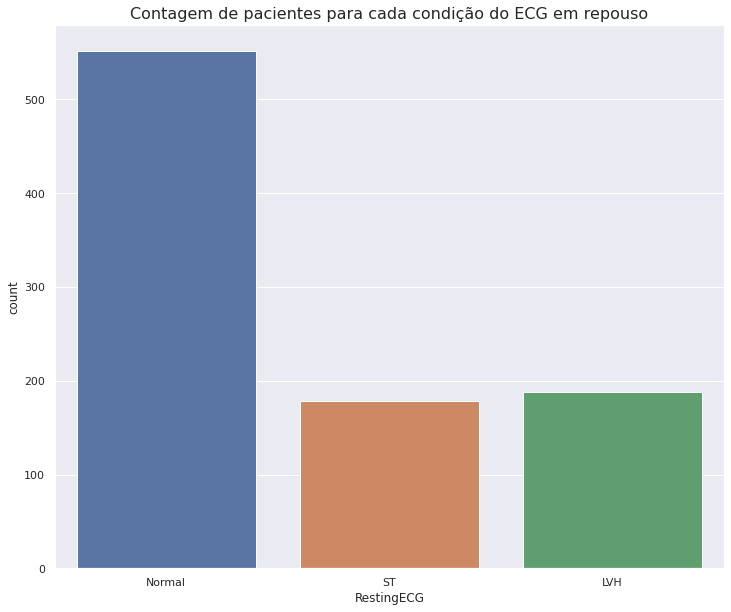

In [79]:
plt.figure(figsize= (12, 10))
ax = sns.countplot(data= dados, x= 'RestingECG')
ax.set_title('Contagem de pacientes para cada condição do ECG em repouso',fontsize= 16)
plt.show()

## Coluna `MaxHR` (frequência cardíaca máxima)

In [80]:
dados['MaxHR'].value_counts().sort_index()

60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: MaxHR, Length: 119, dtype: int64

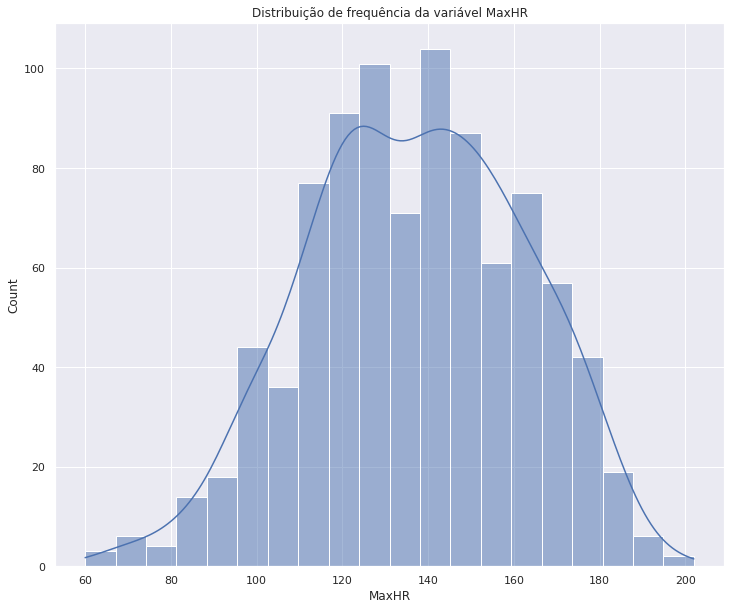

In [81]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(dados['MaxHR'], kde= True)
ax.set_title('Distribuição de frequência da variável MaxHR')
plt.show()

## Coluna `ExerciseAngina` (angina induzida por exercício)

In [82]:
dados['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [83]:
dados['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

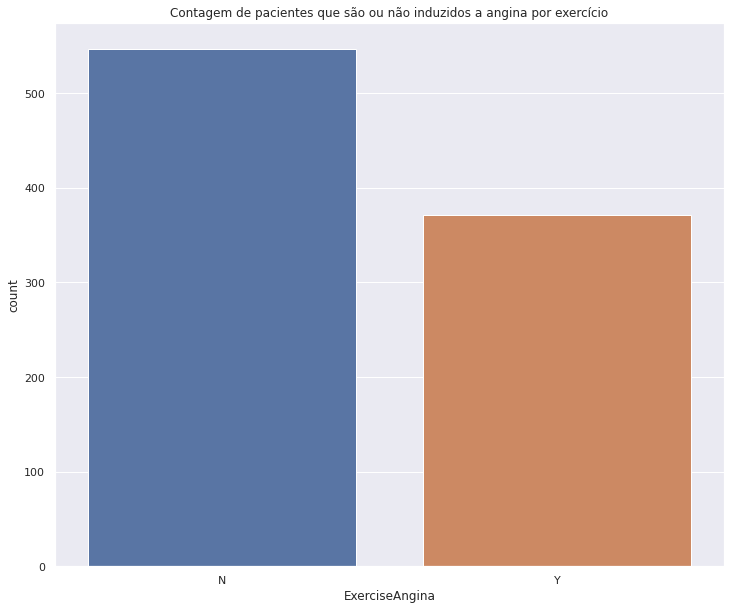

In [84]:
plt.figure(figsize= (12, 10))
ax = sns.countplot(data= dados, x= 'ExerciseAngina')
ax.set_title('Contagem de pacientes que são ou não induzidos a angina por exercício')
plt.show()

In [85]:
px.pie(dados, 'ExerciseAngina')

## Coluna `Oldpeak` (depressão de ST induzida por exercício)

In [86]:
dados['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [87]:
dados['Oldpeak'].value_counts().sort_index()

-2.6      1
-2.0      1
-1.5      1
-1.1      1
-1.0      2
-0.9      1
-0.8      1
-0.7      1
-0.5      2
-0.1      2
 0.0    368
 0.1     14
 0.2     22
 0.3     11
 0.4     11
 0.5     19
 0.6     14
 0.7      7
 0.8     16
 0.9      4
 1.0     86
 1.1      7
 1.2     26
 1.3      7
 1.4     18
 1.5     53
 1.6     16
 1.7      6
 1.8     17
 1.9      7
 2.0     76
 2.1      2
 2.2      5
 2.3      2
 2.4      4
 2.5     16
 2.6      7
 2.8      7
 2.9      1
 3.0     28
 3.1      1
 3.2      2
 3.4      3
 3.5      2
 3.6      4
 3.7      1
 3.8      1
 4.0      8
 4.2      2
 4.4      1
 5.0      1
 5.6      1
 6.2      1
Name: Oldpeak, dtype: int64

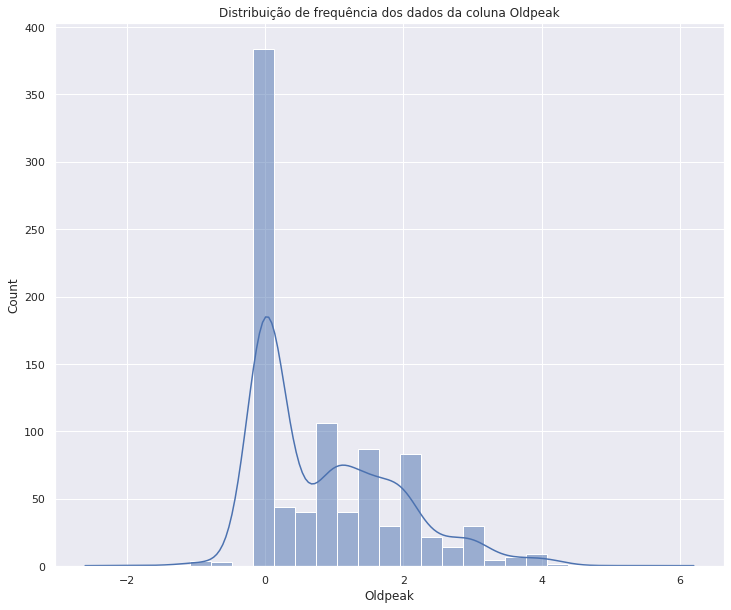

In [88]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(data= dados, x= 'Oldpeak', kde= True)
ax.set_title('Distribuição de frequência dos dados da coluna Oldpeak')
plt.show()

In [89]:
dados.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

## Coluna `ST_Slope` (inclinação do segmento ST no ECG)

In [90]:
dados['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [91]:
dados['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

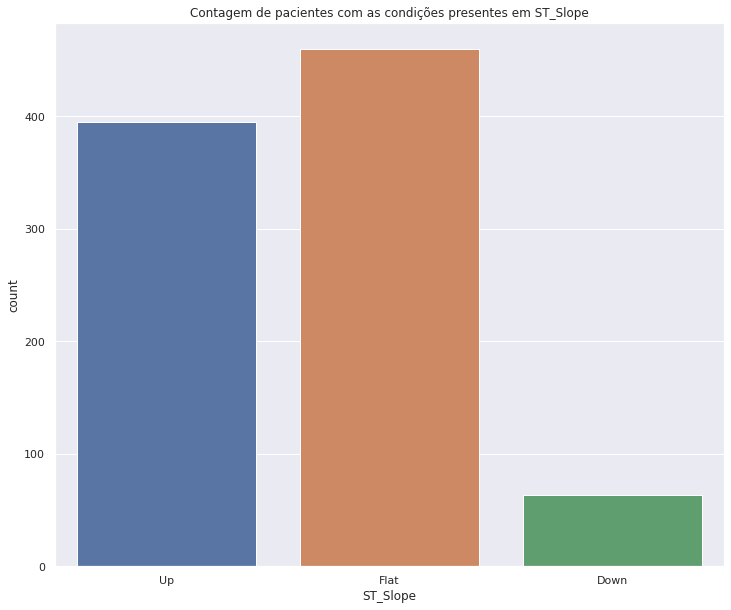

In [92]:
plt.figure(figsize= (12, 10))
ax = sns.countplot(data= dados, x= 'ST_Slope')
ax.set_title('Contagem de pacientes com as condições presentes em ST_Slope')
plt.show()

In [93]:
px.pie(dados, 'ST_Slope')

## Coluna `HeartDisease` (doença cardíaca)

In [94]:
dados['HeartDisease'].unique()

array([0, 1])

In [95]:
dados['HeartDisease'].value_counts().sort_index()

0    410
1    508
Name: HeartDisease, dtype: int64

Não possui doença cardíaca: 0

Possui doença cardíaca: 1

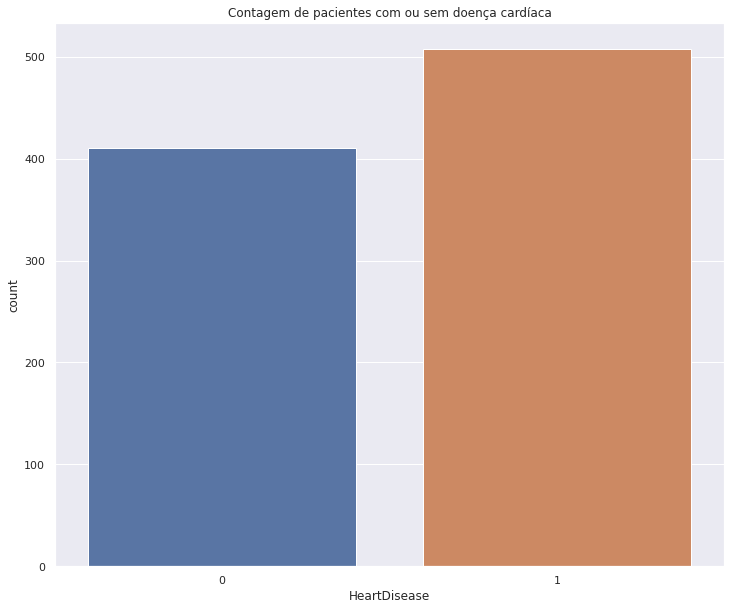

In [96]:
plt.figure(figsize= (12, 10))
ax = sns.countplot(data= dados, x= 'HeartDisease')
ax.set_title('Contagem de pacientes com ou sem doença cardíaca')
plt.show()

In [97]:
px.pie(dados, 'HeartDisease')

# Análise e tratamento dos dados

## Tipos de dados

In [98]:
dados.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Valores faltantes (`NaN`)

In [99]:
dados.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Estatísticas descritivas

In [100]:
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [101]:
dados.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


## Tratamento da coluna `RestingBP`

A coluna possui valores **ZERO** que não são compatíveis com a variável, pois indicam que a frequência cardíaca é **ZERO** em repouso. Portanto, esses valores podem ser retirados.

* A quantidade de linhas em que **ZERO** aparece em `RestingBP` é:

In [102]:
dados.query('RestingBP == 0')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Ou seja, em apenas uma linha, que pode ser eliminada!

In [103]:
dados = dados.loc[dados['RestingBP'] != 0]

In [104]:
dados.shape

(917, 12)

## Tratamento da coluna `Cholesterol`

Na coluna `Cholesterol` também há valores **NULOS**, o que não é condizente com a variável, portanto, esses valores devem ser tratados.

In [105]:
dados.query('Cholesterol == 0').shape

(171, 12)

Os valores podem ser substituídos pela média da coluna excetuando os dados **NULOS**.

In [106]:
average_cholesterol = dados.query('Cholesterol != 0')['Cholesterol'].mean()

In [107]:
dados['Cholesterol'].replace(0, average_cholesterol, inplace= True)

In [108]:
dados.query('Cholesterol == 0')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


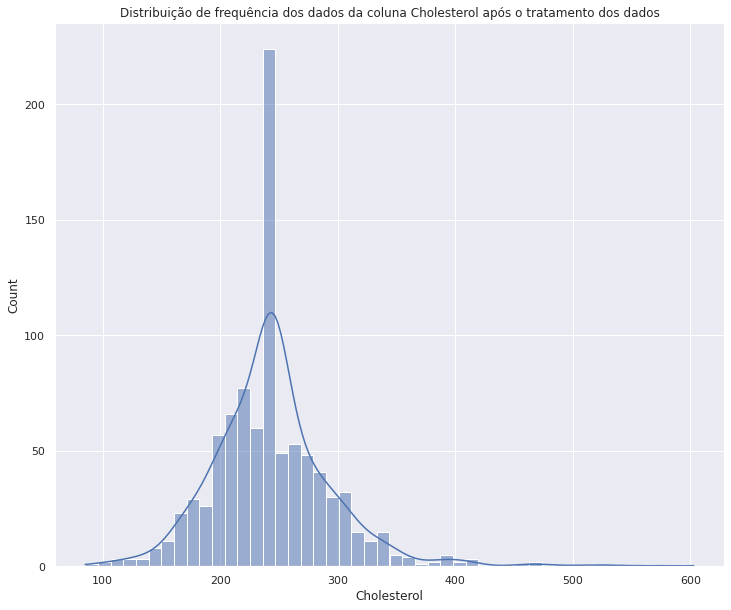

In [109]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(data= dados, x= 'Cholesterol', kde= True)
ax.set_title('Distribuição de frequência dos dados da coluna Cholesterol após o tratamento dos dados')
plt.show()

## Análise de *outliers*

* Coluna `Age`:

In [110]:
px.box(dados['Age'])

* Coluna `MaxHR`

In [111]:
px.box(dados['MaxHR'])

* Coluna `Cholesterol`

In [113]:
px.box(dados['Cholesterol'])

* Coluna `RestinBP`

In [114]:
px.box(dados['RestingBP'])

# Exportando os dados tratados

In [115]:
dados.to_csv('heart_disease_tratado.csv', index= False, encoding= 'utf-8')